In [1]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice

In [2]:
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

#TODO: function that pairs up P2(trial n) and P1(trial n+1)

def combine_all_files(path):
    all_files = glob.glob(path + "/*.txt")
    df = pd.DataFrame()
    
    for filename in all_files:
        new_df = organize_trial_by_trial(filename)
        df = pd.concat([df, new_df], axis=0, ignore_index=True)
    return df

In [3]:
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [4]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['s_g1','s_g2','j_g1','j_g2'])

In [5]:
#version is 's' for single player and 'j' for joint
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'j':
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [6]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [7]:
#needs work
def call_call_get_score(df, version):
    p1_g1 = df+'_'+'p1_'+'g1_'+'score'
    p1_g2 = df+'_'+'p1_'+'g2_'+'score'
    p2_g1 = df+'_'+'p2_'+'g1_'+'score'
    p2_g2 = df+'_'+'p2_'+'g2_'+'score'
    p1_g1, p1_g2, p2_g1, p2_g2 = call_get_score(df, version)
    return p1_g1, p1_g2, p2_g1, p2_g2

# Single Player Analysis

In [8]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s01_gamedata.csv')
s01 = df
s01_p1_g1_score,s01_p1_g2_score,s01_score_diff = call_get_score(s01, 's')
s01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,11.220698,1,0
1,1,1,2,1,90,1,2.742137,1,1
2,1,2,1,3,60,1,5.362458,2,1
3,1,2,2,1,90,1,3.699948,2,2
4,1,3,1,2,30,0,3.489552,2,2


In [9]:
#in the s files, p2 is the confederate
#NO SECOND GAME
df = organize_trial_by_trial('data/s02_gamedata.csv')
s02 = df
s02_p1_g1_score = get_score(s02, 1, 1)
s02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,1,30,0,12.598357,0,0
1,1,1,2,1,90,1,2.182159,0,1
2,1,2,1,2,60,1,3.600245,1,1
3,1,2,2,1,90,1,2.628291,1,2
4,1,3,1,2,60,1,3.252174,2,2


In [10]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s03_gamedata.csv')
s03 = df
s03_p1_g1_score,s03_p1_g2_score,s03_score_diff = call_get_score(s03, 's')
s03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,31.921890,0,0
1,1,1,2,1,90,1,4.758381,0,1
2,1,2,1,2,60,1,3.219123,1,1
3,1,2,2,1,90,1,3.491894,1,2
4,1,3,1,1,90,1,2.521189,2,2


In [11]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s05_gamedata.csv')
s05 = df
s05_p1_g1_score,s05_p1_g2_score,s05_score_diff = call_get_score(s05, 's')
s05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,1,7.627847,1,0
1,1,1,2,1,90,1,3.360008,1,1
2,1,2,1,3,90,1,5.575300,2,1
3,1,2,2,1,90,1,5.711864,2,2
4,1,3,1,3,90,1,3.985995,3,2


In [12]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s06_gamedata.csv')
s06 = df
s06_p1_g1_score,s06_p1_g2_score,s06_score_diff = call_get_score(s06, 's')
s06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,90,1,3.134130,1,0
1,1,1,2,1,90,1,9.395702,1,1
2,1,2,1,2,60,0,2.179541,1,1
3,1,2,2,1,90,1,2.545001,1,2
4,1,3,1,3,90,1,2.511049,2,2


In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s07_gamedata.csv')
s07 = df
s07_p1_g1_score,s07_p1_g2_score,s07_score_diff = call_get_score(s07, 's')
s07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,0,13.140095,0,0
1,1,1,2,1,90,1,2.417684,0,1
2,1,2,1,3,60,1,1.725920,1,1
3,1,2,2,1,90,1,2.810070,1,2
4,1,3,1,1,90,0,1.551831,1,2


In [14]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s08_gamedata.csv')
s08 = df
s08_p1_g1_score,s08_p1_g2_score,s08_score_diff = call_get_score(s08, 's')
s08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,1,30,0,13.150472,0,0
1,1,1,2,1,90,1,2.550160,0,1
2,1,2,1,2,90,1,6.812722,1,1
3,1,2,2,1,90,1,3.497989,1,2
4,1,3,1,2,90,1,2.441523,2,2


In [15]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s09_gamedata.csv')
s09 = df
s09_p1_g1_score,s09_p1_g2_score,s09_score_diff = call_get_score(s09, 's')
s09.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,14.642494,1,0
1,1,1,2,1,90,1,2.997907,1,1
2,1,2,1,3,60,1,7.654677,2,1
3,1,2,2,1,90,0,2.905190,2,1
4,1,3,1,1,90,1,3.873310,3,1


In [16]:
score_diff = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s08_score_diff, s09_score_diff]})

# Score diff between G1 and G2

In [17]:
score_diff

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s08,-10
6,s09,5


In [18]:
#increase in every participant except 1
#df excluding outliar
score_diff_ex = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's09'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s09_score_diff]})

In [19]:
score_diff_ex

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s09,5


In [20]:
score_diff_mean = score_diff['score_diff'].mean()

In [21]:
score_diff_ex_mean = score_diff_ex['score_diff'].mean()

In [22]:
score_diff_mean

5.428571428571429

In [23]:
score_diff_ex_mean

8.0

# Scores in G1 and G2

In [24]:
s_scores_1 = pd.DataFrame({'participant':['s01', 's02', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
     [s01_p1_g1_score, s02_p1_g1_score, s03_p1_g1_score, s05_p1_g1_score,
      s06_p1_g1_score, s07_p1_g1_score, s08_p1_g1_score, s09_p1_g1_score]})
s_scores_1.set_index('participant', inplace=True, drop=True)
s_scores_2 = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09'], 'score':
    [s01_p1_g2_score, s03_p1_g2_score, s05_p1_g2_score, 
    s06_p1_g2_score, s07_p1_g2_score, s08_p1_g2_score, s09_p1_g2_score]})
s_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
s_scores_1

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65


In [25]:
s_scores_2

,score
participant,
s01,74
s03,71
s05,88
s06,87
s07,68
s08,80
s09,70


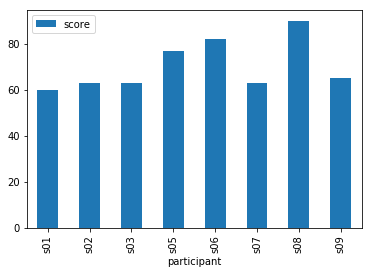

In [26]:
s_scores_1_bar = s_scores_1.plot.bar()

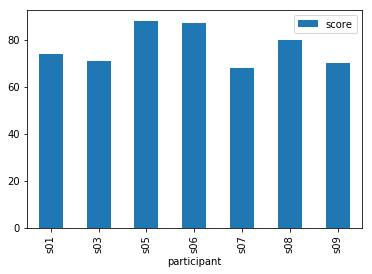

In [27]:
s_scores_2_bar = s_scores_2.plot.bar()

In [28]:
#combine g1 and g2 to one dataframe
s_combo = s_scores_1.append(s_scores_2)

In [29]:
'''s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'
                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':
     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,
      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,
      s09_p1_g1_score, s09_p1_g2_score]})
s_combo.set_index('participant', inplace=True, drop=True)'''

"s_combo = pd.DataFrame({'participant':['s01', 's01', 's02', 's03', 's03','s05', 's05'\n                               's06', 's06','s07','s07','s08','s08','s09','s09'], 'score':\n     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,\n      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,\n      s09_p1_g1_score, s09_p1_g2_score]})\ns_combo.set_index('participant', inplace=True, drop=True)"

In [30]:

#new_index = ('s01_g1','s01_g2','s02_g1','s03_g1','s03_g2','s05_g1','s05_g2', 
                               #'s06_g1','s06_g2','s07_g1','s07_g2','s08_g1','s08_g2','s09_g1','s09_g2')
#s_combo.index = new_index

In [31]:
s_combo

,score
participant,
s01,60
s02,63
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65
s01,74


In [32]:
s_combo = s_combo.sort_values(by=['participant'])

In [33]:
s_combo

,score
participant,
s01,60
s01,74
s02,63
s03,63
s03,71
s05,77
s05,88
s06,82
s06,87


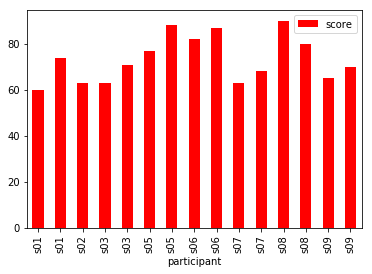

In [34]:
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red','red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(s_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
s_combo_bar = s_combo.plot(kind='bar',color=colors)

In [35]:
s_scores_1_mean = s_scores_1.mean()

In [36]:
s_scores_1_std = s_scores_1.std()

In [37]:
s_scores_2_mean = s_scores_2.mean()

In [38]:
s_scores_2_std = s_scores_1.std()

In [39]:
s_scores_2_std = s_scores_2.std()

In [40]:
#does everyone do better in the second game? 
#does the player that did better in the first game always do better in the second game?

In [41]:
#j_g1_scores = pd.DataFrame([j02_p1_g1_score, j02_p2_g1_score, j01_p1_g1_score, j01_p2_g1_score, j03_p1_g1_score, j03_p2_g1],index = ['j02_p1_g1_score', 'j02_p2_g1_score', 'jo1_p1_g1_score', 'j01_p2_g1_score', 'j03_p1_g1', 'j03_p2_g1'], columns=['score'])

In [42]:
s_list = [s01,s02,s03,s05,s06,s07,s08,s09]

In [43]:
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s02_p1_g1, s02_p1_g2 = separate_df(s02, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [44]:
s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s02_p1_g1_count = s02_p1_g1['probability'].value_counts(sort=False) #no second game
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)

In [45]:
s01_p1_g1_count

30    38
60    43
90    19
Name: probability, dtype: int64

In [46]:
s02_p1_g1_count

30    23
60    27
90    50
Name: probability, dtype: int64

In [47]:
s03_p1_g1_count

30    28
60    38
90    34
Name: probability, dtype: int64

In [48]:
s05_p1_g1_count

30    11
60    35
90    54
Name: probability, dtype: int64

In [49]:
s06_p1_g1_count

30    11
60    13
90    76
Name: probability, dtype: int64

In [50]:
s07_p1_g1_count

30    25
60    29
90    46
Name: probability, dtype: int64

In [51]:
s08_p1_g1_count

30     2
60     6
90    92
Name: probability, dtype: int64

In [52]:
s09_p1_g1_count

30    17
60    38
90    45
Name: probability, dtype: int64

In [53]:
s_g1_counts = pd.DataFrame([s01_p1_g1_count, s02_p1_g1_count, s03_p1_g1_count, 
                            s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, s08_p1_g1_count, s09_p1_g1_count],
                          index=['s01_p1_g1_count', 's02_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 's09_p1_g1_count'])

# Choices in G1 and G2

In [54]:
s_g1_counts

,30,60,90
s01_p1_g1_count,38,43,19
s02_p1_g1_count,23,27,50
s03_p1_g1_count,28,38,34
s05_p1_g1_count,11,35,54
s06_p1_g1_count,11,13,76
s07_p1_g1_count,25,29,46
s08_p1_g1_count,2,6,92
s09_p1_g1_count,17,38,45


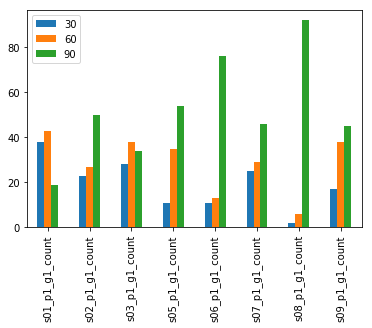

In [55]:
s_g1_counts_bar = s_g1_counts.plot.bar()

In [56]:
s_g1_low = np.mean(s_g1_counts.iloc[:,0])

In [57]:
s_g1_med = np.mean(s_g1_counts.iloc[:,1])

In [58]:
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [59]:
s_g1_low_std = np.std(s_g1_counts.iloc[:,0])
s_g1_med_std = np.std(s_g1_counts.iloc[:,1])
s_g1_high_std = np.std(s_g1_counts.iloc[:,2])

In [60]:
s_g1_low

19.375

In [61]:
s_g1_med

28.625

In [62]:
s_g1_high

52.0

In [63]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count],
                          index=['s01_p1_g2_count', 's03_p1_g2_count', 
                            's05_p1_g2_count', 's06_p1_g2_count', 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count'])

In [64]:
s_g2_counts

,30,60,90
s01_p1_g2_count,38.0,16.0,46.0
s03_p1_g2_count,27.0,29.0,44.0
s05_p1_g2_count,11.0,NaN,89.0
s06_p1_g2_count,7.0,7.0,86.0
s07_p1_g2_count,18.0,32.0,50.0
s08_p1_g2_count,9.0,15.0,76.0
s09_p1_g2_count,14.0,37.0,49.0


In [65]:
#maximizing and matching?

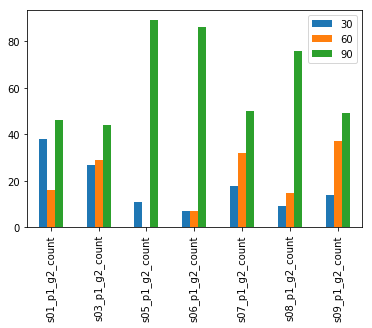

In [66]:
s_g2_counts_bar = s_g2_counts.plot.bar()

In [67]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [68]:
s_g2_low_std = np.std(s_g2_counts.iloc[:,0])
s_g2_med_std = np.std(s_g2_counts.iloc[:,1])
s_g2_high_std = np.std(s_g2_counts.iloc[:,2])

In [69]:
s_g2_low

17.714285714285715

In [70]:
s_g2_med

22.666666666666668

In [71]:
s_g2_high

62.857142857142854

# Joint Analysis

In [72]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,5.121547,1,0
1,1,1,2,3,60,1,10.059181,1,1
2,1,2,1,1,90,1,5.572331,2,1
3,1,2,2,2,90,1,9.317537,2,2
4,1,3,1,2,30,0,172.400421,2,2


In [73]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,8.298026,0,0
1,1,1,2,1,60,1,3.542303,0,1
2,1,2,1,2,90,1,3.194470,1,1
3,1,2,2,3,90,1,3.182476,1,2
4,1,3,1,2,90,1,2.676718,2,2


In [74]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,90,1,80.800301,1,0
1,1,1,2,2,30,0,9.031185,1,0
2,1,2,1,3,30,1,3.031548,2,0
3,1,2,2,1,60,1,4.375411,2,1
4,1,3,1,2,90,1,5.156529,3,1


In [75]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,30,0,9.824295,0,0
1,1,1,2,2,90,0,3.709223,0,0
2,1,2,1,3,60,1,3.024550,1,0
3,1,2,2,2,90,1,2.635748,1,1
4,1,3,1,2,30,0,6.731772,1,1


In [76]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,90,1,11.781368,1,0
1,1,1,2,1,90,1,4.329930,1,1
2,1,2,1,3,60,1,11.137623,2,1
3,1,2,2,2,30,0,7.020643,2,1
4,1,3,1,1,30,0,2.390858,2,1


In [77]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,30,0,15.769461,0,0
1,1,1,2,2,60,1,6.990658,0,1
2,1,2,1,1,90,1,3.539307,1,1
3,1,2,2,3,90,1,3.229456,1,2
4,1,3,1,2,60,1,2.564774,2,2


In [78]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,2,60,1,14.161229,1,0
1,1,1,2,3,30,0,7.531399,1,0
2,1,2,1,1,30,0,4.872670,1,0
3,1,2,2,2,60,1,3.163488,1,1
4,1,3,1,3,90,1,5.052585,2,1


In [79]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

,game number,trial,player,arm,probability,reward,time,P1 score,P2 score
0,1,1,1,3,60,1,3.760202,1,0
1,1,1,2,2,30,0,4.963627,1,0
2,1,2,1,3,60,1,2.788667,2,0
3,1,2,2,1,90,1,3.580288,2,1
4,1,3,1,3,60,1,3.108514,3,1


# Scores in G1 and G2

In [207]:
j_scores_1 = pd.DataFrame({'participant':['j01_p1_g1_score','j01_p2_g1_score','j02_p1_g1_score','j02_p2_g1_score','j03_p1_g1_score','j03_p2_g1_score','j04_p1_g1_score',
      'j04_p2_g1_score','j05_p1_g1_score','j05_p2_g1_score','j06_p1_g1_score','j06_p2_g1_score','j07_p1_g1_score','j07_p2_g1_score',
      'j08_p1_g1_score', 'j08_p2_g1_score'], 'score':
     [j01_p1_g1_score,j01_p2_g1_score,j02_p1_g1_score,j02_p2_g1_score,j03_p1_g1_score,j03_p2_g1_score,j04_p1_g1_score,
      j04_p2_g1_score,j05_p1_g1_score,j05_p2_g1_score,j06_p1_g1_score,j06_p2_g1_score,j07_p1_g1_score,j07_p2_g1_score,
      j08_p1_g1_score, j08_p2_g1_score]})
j_scores_1.set_index('participant', inplace=True, drop=True)
j_scores_2 = pd.DataFrame({'participant':['j01_p1_g2_score','j01_p2_g2_score','j02_p1_g2_score','j02_p2_g2_score','j03_p1_g2_score','j03_p2_g2_score','j04_p1_g2_score',
      'j04_p2_g2_score','j05_p1_g2_score','j05_p2_g2_score','j06_p1_g2_score','j06_p2_g2_score','j07_p1_g2_score','j07_p2_g2_score',
      'j08_p1_g2_score', 'j08_p2_g2_score'], 'score':
     [j01_p1_g2_score,j01_p2_g2_score,j02_p1_g2_score,j02_p2_g2_score,j03_p1_g2_score,j03_p2_g2_score,j04_p1_g2_score,
      j04_p2_g2_score,j05_p1_g2_score,j05_p2_g2_score,j06_p1_g2_score,j06_p2_g2_score,j07_p1_g2_score,j07_p2_g2_score,
      j08_p1_g2_score, j08_p2_g2_score]})
j_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
j_scores_1

,score
participant,
j01_p1_g1_score,57
j01_p2_g1_score,61
j02_p1_g1_score,54
j02_p2_g1_score,68
j03_p1_g1_score,69
j03_p2_g1_score,67
j04_p1_g1_score,64
j04_p2_g1_score,56
j05_p1_g1_score,77


In [208]:
j_scores_2

,score
participant,
j01_p1_g2_score,73
j01_p2_g2_score,60
j02_p1_g2_score,72
j02_p2_g2_score,76
j03_p1_g2_score,82
j03_p2_g2_score,75
j04_p1_g2_score,60
j04_p2_g2_score,54
j05_p1_g2_score,70


In [82]:
j_scores_1_mean = j_scores_1.mean()

In [83]:
j_scores_1_std = j_scores_1.std()

In [84]:
j_scores_2_mean = j_scores_2.mean()

In [85]:
j_scores_2_std = j_scores_2.std()

In [86]:
#combine g1 and g2 to one dataframe
j_combo = j_scores_1.append(j_scores_2)

In [87]:
j_combo

,score
participant,
j01_p1_g1_score,57
j01_p2_g1_score,61
j02_p1_g1_score,54
j02_p2_g1_score,68
j03_p1_g1_score,69
j03_p2_g1_score,67
j04_p1_g1_score,64
j04_p2_g1_score,56
j05_p1_g1_score,77


In [88]:
j_combo = j_combo.sort_values(by=['participant'])

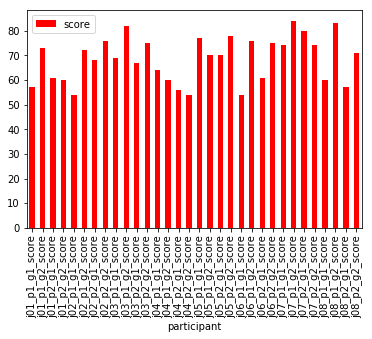

In [89]:
j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [90]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [91]:
j_score_diff

,participant,score_diff
0,j01_p1,16
1,j01_p2,-1
2,j02_p1,18
3,j02_p2,8
4,j03_p1,13
5,j03_p2,8
6,j04_p1,-4
7,j04_p2,-2
8,j05_p1,-7
9,j05_p2,8


In [92]:
#impairs learning?

In [93]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [94]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [95]:
j_score_diff_mean

8.375

In [96]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/Users/baryosef/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


# Choice Distributions

In [97]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)

In [98]:
j01_p1_g1_count

30    38
60    36
90    26
Name: probability, dtype: int64

In [99]:
j01_p1_g2_count

30    18
60    28
90    54
Name: probability, dtype: int64

In [100]:
j01_p2_g1_count

30    33
60    37
90    30
Name: probability, dtype: int64

In [101]:
j01_p2_g2_count

30    26
60    37
90    37
Name: probability, dtype: int64

In [102]:
j02_p1_g1_count

30    36
60    32
90    32
Name: probability, dtype: int64

In [103]:
j02_p1_g2_count

30    27
60    27
90    46
Name: probability, dtype: int64

In [104]:
j02_p2_g1_count

30    25
60    39
90    36
Name: probability, dtype: int64

In [105]:
j02_p2_g2_count

30     9
60    26
90    65
Name: probability, dtype: int64

In [106]:
j03_p1_g1_count

30    22
60    29
90    49
Name: probability, dtype: int64

In [107]:
j03_p1_g2_count

30     7
60    23
90    70
Name: probability, dtype: int64

In [108]:
j03_p2_g1_count

30    29
60    23
90    48
Name: probability, dtype: int64

In [109]:
j03_p2_g2_count

30    10
60     7
90    83
Name: probability, dtype: int64

In [110]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, 
                            j03_p1_g1_count, j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count,
                           j05_p1_g1_count,j05_p2_g1_count, j06_p1_g1_count, j06_p2_g1_count, j07_p1_g1_count, 
                            j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count],
                          index=['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                            'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count',
                           'j05_p1_g1_count','j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                            'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count'])

In [111]:
j_g1_counts

,30,60,90
j01_p1_g1_count,38,36,26
j01_p2_g1_count,33,37,30
j02_p1_g1_count,36,32,32
j02_p2_g1_count,25,39,36
j03_p1_g1_count,22,29,49
j03_p2_g1_count,29,23,48
j04_p1_g1_count,26,39,35
j04_p2_g1_count,34,22,44
j05_p1_g1_count,5,16,79
j05_p2_g1_count,14,28,58


In [112]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

j_g1_low_std = np.std(j_g1_counts.iloc[:,0])
j_g1_med_std = np.std(j_g1_counts.iloc[:,1])
j_g1_high_std = np.std(j_g1_counts.iloc[:,2])

In [113]:
j_g1_low

29.125

In [114]:
j_g1_med

29.1875

In [115]:
j_g1_high

41.6875

In [116]:
#social matching

In [117]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [118]:
j_g2_counts

,30,60,90
j01_p1_g2_count,18,28,54
j01_p2_g2_count,26,37,37
j02_p1_g2_count,27,27,46
j02_p2_g2_count,9,26,65
j03_p1_g2_count,7,23,70
j03_p2_g2_count,10,7,83
j04_p1_g2_count,42,32,26
j04_p2_g2_count,40,40,20
j05_p1_g2_count,20,15,65
j05_p2_g2_count,7,40,53


In [119]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [120]:
j_g2_low

16.3125

In [121]:
j_g2_med

26.0

In [122]:
j_g2_high

57.6875

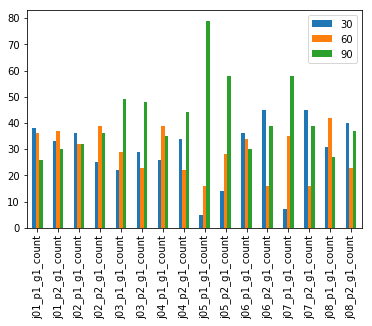

In [123]:
j_g1_counts_bar = j_g1_counts.plot.bar()

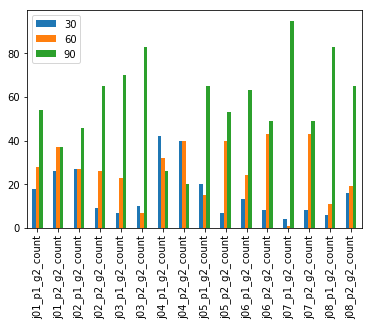

In [124]:
j_g2_counts_bar = j_g2_counts.plot.bar()

In [ ]:
#difference in 60% choices

# Combined Tables

In [125]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]},index = ['s_1','s_2',
                                                                                                     'j_1', 'j_2'])

In [126]:
s_scores_1_mean

score    70.375
dtype: float64

In [127]:
pd.to_numeric(s_scores_1_mean)

score    70.375
dtype: float64

In [128]:
scores_df

,score,std
s_1,score 70.375 dtype: float64,score 11.109038 dtype: float64
s_2,score 76.857143 dtype: float64,score 8.214389 dtype: float64
j_1,score 64.3125 dtype: float64,score 8.187134 dtype: float64
j_2,score 72.6875 dtype: float64,score 8.42788 dtype: float64


In [ ]:
#calculate the deviation in diff b/w g1 and g2

In [129]:
counts_df = pd.DataFrame({'low':[s_g1_low,s_g2_low,j_g1_low,j_g2_low],'medium':[s_g1_med,s_g2_med,j_g1_med,j_g2_med],
                          'high':[s_g1_high,s_g2_high,j_g1_high,j_g2_high]},index = ['s_1','s_2','j_1', 'j_2'])
#add standard deviations

In [130]:
counts_df

,low,medium,high
s_1,19.375000,28.625000,52.000000
s_2,17.714286,22.666667,62.857143
j_1,29.125000,29.187500,41.687500
j_2,16.312500,26.000000,57.687500


In [209]:
#calculate variability in these

In [210]:
#make a scatter plot of choices
#box plot showing individual scores and outliers 

In [131]:
counts_std_df = pd.DataFrame({'low':[s_g1_low_std,s_g2_low_std,j_g1_low_std,j_g2_low_std],'medium':[s_g1_med_std,s_g2_med_std,j_g1_med_std,j_g2_med_std],
                          'high':[s_g1_high_std,s_g2_high_std,j_g1_high_std,j_g2_high_std]},index = ['s_1','s_2','j_1', 'j_2'])

In [132]:
counts_std_df

,low,medium,high
s_1,10.688048,12.154603,21.453438
s_2,10.333224,10.656245,18.473367
j_1,11.767938,8.589374,13.613958
j_2,11.509337,12.564832,19.668245


In [211]:
#variability is lower in s and higher in j for game 2

# Maximizing/Matching

In [133]:
scores

,s_g1,s_g2,j_g1,j_g2


In [134]:
def jsd(p, q, base=np.e):
    '''
        Implementation of pairwise `jsd` based on  
        https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    '''
    ## convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    ## normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [135]:
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [136]:
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [137]:
social_max = [0, 100, 0]
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [138]:
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [139]:
s01_p1_g1_count

30    38
60    43
90    19
Name: probability, dtype: int64

In [140]:
from scipy import stats

In [141]:
#test = jsd(maximize,match)

In [142]:
#test

In [143]:
s01 = 'match'

In [144]:
s05_p1_g2_count

30    11
90    89
Name: probability, dtype: int64

In [145]:
s05_p1_g2_count = [11,0,89]

In [146]:
s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s02_g1_max,s02_g1_match = call_jsd(s02_p1_g1_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd(s06_p1_g2_count)
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)

In [147]:
s_jsd = pd.DataFrame({'max':[s01_g1_max,s01_g2_max,s02_g1_max,s03_g1_max,s03_g2_max,s05_g1_max,s05_g2_max,s06_g1_max,
                      s06_g2_max,s07_g1_max,s07_g2_max,s08_g1_max,s08_g2_max,s09_g1_max,s09_g2_max],
                      'match':[s01_g1_match,s01_g2_match,s02_g1_match,s03_g1_match,s03_g2_match,s05_g1_match
                               ,s05_g2_match,s06_g1_match,s06_g2_match,s07_g1_match,s07_g2_match,s08_g1_match
                               ,s08_g2_match,s09_g1_match,s09_g2_match]},
                        index=['s01', 's01', 's02', 's03', 's03','s05', 's05','s06', 's06','s07','s07','s08','s08','s09','s09'])

In [148]:
#NOT WORKING
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        if social == True:
            if num >= jsd(social_max,social_match):
                types = types.append({'type' : 'neither'},ignore_index=True)
        else:
            if num >= jsd(maximize,match):
                types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [149]:
#s_jsd.apply(check_type,axis=1)

In [150]:
s_types = check_type(s_jsd)

s01 0.4318754981734429 0.06054148947299787
matchi
s01 0.23828696089939724 0.03734820425576257
matchi
s02 0.21576155433883565 0.004203991740820154
matchi
s03 0.3136608967716278 0.015697836724085833
matchi
s03 0.24998841732128801 0.007883430429554528
matchi
s05 0.19430446226785061 0.0034085885935871106
matchi
s05 0.03972452885343111 0.1461736151764258
maxi
s06 0.09138502722922329 0.03951762558866109
matchi
s06 0.05115720438972227 0.08099558695124337
maxi
s07 0.23828696089939724 0.0053654131945676635
matchi
s07 0.21576155433883565 0.0001962686894984066
matchi
s08 0.0285594618498793 0.11676336139531006
maxi
s08 0.09138502722922329 0.03715094344349118
matchi
s09 0.24409937049739652 0.0014302350058570182
matchi
s09 0.22128824866172747 0.0010837956905053819
matchi


In [151]:
s_types

,type
0,NaN
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,maxi
8,matchi
9,maxi


In [152]:
s_types.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,maxi
8,matchi
9,maxi
10,matchi


In [153]:
threshold = jsd(maximize,match)

In [154]:
threshold

0.21576155433883576

In [155]:
s_jsd

,max,match
s01,0.431875,0.060541
s01,0.238287,0.037348
s02,0.215762,0.004204
s03,0.313661,0.015698
s03,0.249988,0.007883
s05,0.194304,0.003409
s05,0.039725,0.146174
s06,0.091385,0.039518
s06,0.051157,0.080996
s07,0.238287,0.005365


In [156]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd(j08_p2_g2_count)

In [157]:
j_jsd = pd.DataFrame({'max':[j01_p1_g1_max,j01_p1_g2_max,j01_p2_g1_max,j01_p2_g2_max,j02_p1_g1_max,j02_p1_g2_max,j02_p2_g1_max,
                             j02_p2_g2_max,j03_p1_g1_max,j03_p1_g2_max,j03_p2_g1_max,j03_p2_g1_max,j04_p1_g1_max,j04_p1_g2_max,
                             j04_p2_g1_max,j04_p2_g2_max,j05_p1_g1_max,j05_p1_g2_max,j05_p2_g1_max,j05_p2_g2_max,j06_p1_g1_max,
                             j06_p1_g2_max,j06_p2_g1_max,j06_p2_g2_max,j07_p1_g1_max,j07_p1_g2_max,j07_p2_g1_max,j07_p2_g2_max,
                             j08_p1_g1_max,j08_p1_g2_max,j08_p2_g1_max,j08_p2_g2_max],
                      'match':[j01_p1_g1_match,j01_p1_g2_match,j01_p2_g1_match,j01_p2_g2_match,j02_p1_g1_match,j02_p1_g2_match,
                               j02_p2_g1_match,j02_p2_g2_match,j03_p1_g1_match,j03_p1_g2_match,j03_p2_g1_match,j03_p2_g2_match,
                               j04_p1_g1_match,j04_p1_g2_match,j04_p2_g1_match,j04_p2_g2_match,j05_p1_g1_match,j05_p1_g2_match,
                               j05_p2_g1_match,j05_p2_g2_match,j06_p1_g1_match,j06_p1_g2_match,j06_p2_g1_match,j06_p2_g2_match,
                               j07_p1_g1_match,j07_p1_g2_match,j07_p2_g1_match,j07_p2_g2_match,j08_p1_g1_match,j08_p1_g2_match,j08_p2_g1_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01','j01', 'j01', 'j02', 'j02','j02', 'j02', 'j03', 'j03','j03', 'j03','j04', 'j04','j04', 'j04','j05', 'j05','j05', 'j05',
                               'j06', 'j06','j06', 'j06','j07','j07','j07','j07','j08','j08','j08','j08'])

In [158]:
j_types = check_type(j_jsd)

j01 0.37242722211735246 0.040908395510238574
matchi
j01 0.19430446226785064 0.0016738328971046858
matchi
j01 0.3420144880071857 0.026793253013230066
matchi
j01 0.2935651532009069 0.01049833039560729
matchi
j02 0.3276007490949424 0.028191250575098234
matchi
j02 0.23828696089939724 0.008253521086056073
matchi
j02 0.30016036017557546 0.011028978242923135
matchi
j02 0.1400031203020941 0.012990426323189502
matchi
j03 0.22128824866172742 0.002623936882068798
matchi
j03 0.11727693677854416 0.02330344561117382
matchi
j03 0.2268834335864397 0.013299200569501346
matchi
j03 0.2268834335864397 0.07161673842036505
matchi
j04 0.3068577088686985 0.012909072374830417
matchi
j04 0.37242722211735246 0.04761257786950016
matchi
j04 0.24998841732128801 0.021930764983990762
matchi
j04 0.4228104552401625 0.05947347895817765
matchi
j05 0.07895387905098877 0.048562468411548376
matchi
j05 0.14000312030209408 0.023491857082624718
matchi
j05 0.17381067052114874 0.003224168082350133
matchi
j05 0.19957462078009014 

In [159]:
j_types.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,matchi
8,matchi
9,matchi
10,matchi


In [160]:
j_jsd

,max,match
j01,0.372427,0.040908
j01,0.194304,0.001674
j01,0.342014,0.026793
j01,0.293565,0.010498
j02,0.327601,0.028191
j02,0.238287,0.008254
j02,0.300160,0.011029
j02,0.140003,0.012990
j03,0.221288,0.002624
j03,0.117277,0.023303


In [161]:
#same for joint using "social"

In [162]:
j01_p1_g1_max,j01_p1_g1_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd_social(j08_p2_g2_count)

In [163]:
j_jsd_social = pd.DataFrame({'max':[j01_p1_g1_max,j01_p1_g2_max,j01_p2_g1_max,j01_p2_g2_max,j02_p1_g1_max,j02_p1_g2_max,j02_p2_g1_max,
                             j02_p2_g2_max,j03_p1_g1_max,j03_p1_g2_max,j03_p2_g1_max,j03_p2_g1_max,j04_p1_g1_max,j04_p1_g2_max,
                             j04_p2_g1_max,j04_p2_g2_max,j05_p1_g1_max,j05_p1_g2_max,j05_p2_g1_max,j05_p2_g2_max,j06_p1_g1_max,
                             j06_p1_g2_max,j06_p2_g1_max,j06_p2_g2_max,j07_p1_g1_max,j07_p1_g2_max,j07_p2_g1_max,j07_p2_g2_max,
                             j08_p1_g1_max,j08_p1_g2_max,j08_p2_g1_max,j08_p2_g2_max],
                      'match':[j01_p1_g1_match,j01_p1_g2_match,j01_p2_g1_match,j01_p2_g2_match,j02_p1_g1_match,j02_p1_g2_match,
                               j02_p2_g1_match,j02_p2_g2_match,j03_p1_g1_match,j03_p1_g2_match,j03_p2_g1_match,j03_p2_g2_match,
                               j04_p1_g1_match,j04_p1_g2_match,j04_p2_g1_match,j04_p2_g2_match,j05_p1_g1_match,j05_p1_g2_match,
                               j05_p2_g1_match,j05_p2_g2_match,j06_p1_g1_match,j06_p1_g2_match,j06_p2_g1_match,j06_p2_g2_match,
                               j07_p1_g1_match,j07_p1_g2_match,j07_p2_g1_match,j07_p2_g2_match,j08_p1_g1_match,j08_p1_g2_match,j08_p2_g1_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01','j01', 'j01', 'j02', 'j02','j02', 'j02', 'j03', 'j03','j03', 'j03','j04', 'j04','j04', 'j04','j05', 'j05','j05', 'j05',
                               'j06', 'j06','j06', 'j06','j07','j07','j07','j07','j08','j08','j08','j08'])

In [164]:
j_types_social = check_type(j_jsd,True)

j01 0.37242722211735246 0.040908395510238574
matchi
j01 0.19430446226785064 0.0016738328971046858
matchi
j01 0.3420144880071857 0.026793253013230066
matchi
j01 0.2935651532009069 0.01049833039560729
matchi
j02 0.3276007490949424 0.028191250575098234
matchi
j02 0.23828696089939724 0.008253521086056073
matchi
j02 0.30016036017557546 0.011028978242923135
matchi
j02 0.1400031203020941 0.012990426323189502
matchi
j03 0.22128824866172742 0.002623936882068798
matchi
j03 0.11727693677854416 0.02330344561117382
matchi
j03 0.2268834335864397 0.013299200569501346
matchi
j03 0.2268834335864397 0.07161673842036505
matchi
j04 0.3068577088686985 0.012909072374830417
matchi
j04 0.37242722211735246 0.04761257786950016
matchi
j04 0.24998841732128801 0.021930764983990762
matchi
j04 0.4228104552401625 0.05947347895817765
matchi
j05 0.07895387905098877 0.048562468411548376
matchi
j05 0.14000312030209408 0.023491857082624718
matchi
j05 0.17381067052114874 0.003224168082350133
matchi
j05 0.19957462078009014 

In [165]:
j_types_social.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,matchi
8,matchi
9,matchi
10,matchi


In [167]:
#j_jsd_social.drop([0])

In [168]:
#issue

In [169]:
j_jsd_social

,max,match
j01,0.300160,0.003292
j01,0.356942,0.025131
j01,0.293565,0.000921
j01,0.293565,0.003228
j02,0.327601,0.000393
j02,0.364611,0.008408
j02,0.280667,0.004354
j02,0.372427,0.065430
j03,0.349411,0.014097
j03,0.396821,0.084732


In [170]:
threshold

0.21576155433883576

In [176]:
import matplotlib.lines as mlines

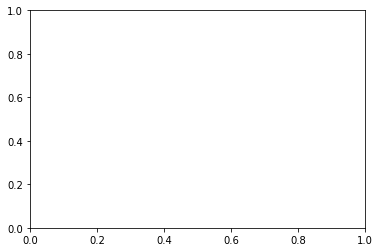

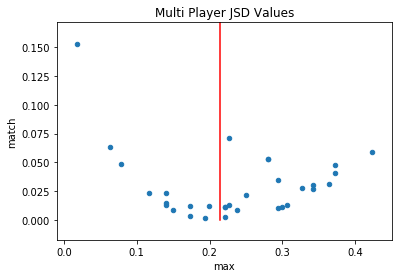

In [194]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()

fig, j_jsd_plot = plt.subplots()
j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
line1 = mlines.Line2D([0.2148, 0.2148],[0, 0.2], color='red')
line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_plot.add_line(line1)
j_jsd_plot.add_line(line2)
plt.show()

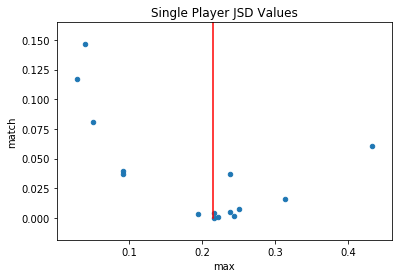

In [196]:
s_jsd_plot = s_jsd.plot.scatter(x='max',y='match',title='Single Player JSD Values')
line1 = mlines.Line2D([0.2148, 0.2148],[0, 0.2], color='red')
s_jsd_plot.add_line(line1)

In [198]:
threshold_social = jsd(social_max,social_match)

In [203]:
threshold_social

0.3182570841474063

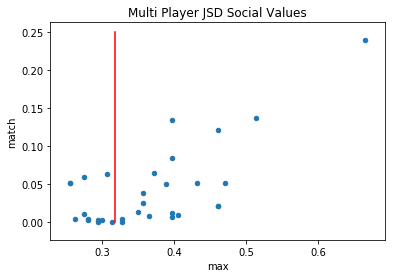

In [206]:
j_jsd_social_plot = j_jsd_social.plot.scatter(x='max',y='match',title='Multi Player JSD Social Values')
line1 = mlines.Line2D([0.3183, 0.3183],[0, 0.25], color='red')
j_jsd_social_plot.add_line(line1)
#everyone could be classified as a matcher. everyone to the left of the red line could be using both
#NEED TO: color differently those who were more of maximizers than matchers!!!

### NOT WORKING
def check_type_3(row):
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            row['type'] = 'max'
            num = maxi
        elif matchi < maxi:
            row['type'] = 'match'
            num = matchi
        else:
            row['type'] = 'neither'
        if num >= jsd(maximize,match):
            row['type'] = 'neither'
            
def check_type_2(df):
    for row in df.itertuples(index=True, name='Pandas'):
        print(index,row["max"],row["match"])
        if row["match"] < row["max"] and row["match"] < jsd(maximize,match):
            df.at[index,'type'] = 'match'
        elif row["max"] < row["match"] and row["max"] < jsd(maximize,match):
            df.at[index,'type'] = 'max'
        else:
            df.at[index,'type'] = 'neither'